In [1]:
from sklearn import svm
from time import time
from pandas import DataFrame
from pathlib import Path
import numpy as np
from sklearn.metrics import f1_score as f1_score_rep
from sklearn.metrics import accuracy_score

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [3]:
# from sklearn import svm
# from time import time
# from pandas import DataFrame
# from pathlib import Path
# import numpy as np
# from sklearn.metrics import f1_score as f1_score_rep
# from sklearn.metrics import accuracy_score

# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV

# # make sure that result directory exists before running any of the functions
# result_dir = Path.cwd() / '/content/drive/MyDrive/Cybersecurity/Datasets/results'
# if not result_dir.exists():
#     result_dir.mkdir()


# def tune_with_halving_grid_search(x_train, y_train, param_grid):
#     svc = svm.SVC()

#     start = time()
#     halving_gs_results = HalvingGridSearchCV(
#         svc,
#         param_grid,
#         cv=5,
#         factor=3,
#         min_resources='exhaust',
#         scoring='f1_weighted'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = DataFrame(halving_gs_results.cv_results_)
#     results.loc[:, 'mean_test_score'] *= 100
#     results.to_csv(result_dir / 'halving_svc_results.csv')

#     # take the most relevant columns and sort (for readability). Remember to sort on the iter columns first, so we see
#     # the models with the most training data behind them first.
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

In [4]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from sklearn.metrics import accuracy_score

# # from hyperparam_tuning import tune_with_grid_search, tune_with_halving_grid_search

# # RANDOM_STATE = 35090



# # use fixed random state for repeatable data set
# # X, Y = make_classification(n_samples=3000, random_state=RANDOM_STATE)
# # x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=RANDOM_STATE)

# svc_params = {
#     'C': [0.1, 0.5, 1,5,10],
#     'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
#     'tol': [1e-3, 1e-2]
# }

# # gs_results, gs_duration = tune_with_grid_search(x_train, y_train, svc_params)
# halving_results, halving_duration = tune_with_halving_grid_search(x_val, y_val, svc_params)

# # print(gs_results.head())
# print(halving_results.head())

# # score1 = gs_results['mean_test_score'].iloc[0]
# # params1 = gs_results['params'].iloc[0]
# score2 = halving_results['mean_test_score'].iloc[0]
# params2 = halving_results['params'].iloc[0]

# # svc1 = svm.SVC(**params1)
# # svc1.fit(x_train, y_train)
# # accuracy1 = accuracy_score(y_test, svc1.predict(x_test))

# svc2 = svm.SVC(**params2)
# svc2.fit(x_train, y_train)
# accuracy2 = accuracy_score(y_test, svc2.predict(x_test))

# # print(f'Best score for GridSearchCv is {score1:.3f}, took {gs_duration:.2f} seconds')
# # print(f'Params: {params1}')
# # print(f'Corresponding test accuracy: {accuracy1 * 100:.2f}%\n')

# print(f'Best score for HalvingGridSearchCv is {score2:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {params2}')
# print(f'Corresponding test accuracy: {accuracy2 * 100:.2f}%')
# print("Micro F1 Score: ", f1_score_rep(y_test, svc2.predict(x_test), average="micro"))
# print("Macro F1 Score: ", f1_score_rep(y_test, svc2.predict(x_test), average="macro"))


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_svm = svm.SVC(C=10, kernel='poly', tol=0.01)
best_svm.fit(x_train, y_train)

y_pred = best_svm.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
# auc = roc_auc_score(y_test, best_svm.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_svm.classes_)
disp.plot()
plt.show()

FPR: [3.82169500e-05 1.11699842e-03 9.29826695e-05 5.89626987e-05
 2.20908227e-05 0.00000000e+00 2.37043422e-04 6.55905791e-03
 3.30714564e-04 0.00000000e+00 1.43844533e-05 4.10571104e-02
 1.04164163e-04 3.57073993e-05 9.11080078e-04 1.21596200e-04
 2.85430894e-05 7.14280612e-06 0.00000000e+00]
TPR: [0.99574378 0.88070175 0.98806683 0.57130301 0.99864468 0.8
 0.97438424 0.99024904 0.99495314 0.27272727 0.99664148 0.99721808
 0.99850911 0.86699507 0.85845327 0.6713948  0.98901099 0.1441048
 1.        ]
FNR: [0.00425622 0.11929825 0.01193317 0.42869699 0.00135532 0.2
 0.02561576 0.00975096 0.00504686 0.72727273 0.00335852 0.00278192
 0.00149089 0.13300493 0.14154673 0.3286052  0.01098901 0.8558952
 0.        ]
TNR: [0.99996178 0.998883   0.99990702 0.99994104 0.99997791 1.
 0.99976296 0.99344094 0.99966929 1.         0.99998562 0.95894289
 0.99989584 0.99996429 0.99908892 0.9998784  0.99997146 0.99999286
 1.        ]
Precision: 0.9669363565160031
Accuracy: 0.9734792840333737
F1-score: 0.

NameError: name 'auc' is not defined

In [ ]:
# print(f"FPR: {fpr}")
# print(f"TPR: {tpr}")
# print(f"FNR: {fnr}")
# print(f"TNR: {tnr}")
# print(f"Precision: {precision}")
# print(f"Accuracy: {accuracy}")
# print(f"F1-score: {f1}")


FPR: 0.002670305055563295
tpr: 0.8415316493484533
fnr: 0.15846835065154677
tnr: 0.9973296949444368


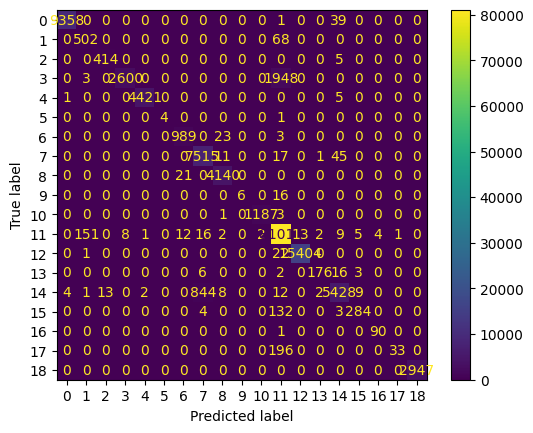

In [6]:
# print(f"AUC: {auc}")
print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_svm.classes_)
disp.plot()
plt.show()

In [1]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

from joblib import dump, load
from sklearn import svm

best_svm = svm.SVC(C=10, kernel='poly', tol=0.01)
best_svm.fit(x_train, y_train)

dump(best_svm, "/home/jovyan/X-IIoTID/pre_train/SVM.joblib")

['/home/jovyan/X-IIoTID/pre_train/SVM.joblib']